In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

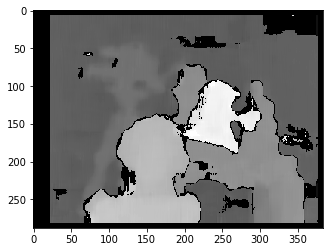

In [2]:
imgL = cv.imread('../data/tsukuba_l.png',0)
imgR = cv.imread('../data/tsukuba_r.png',0)
stereo = cv.StereoBM_create(numDisparities=16, blockSize=15)
disparity = stereo.compute(imgL,imgR)
plt.imshow(disparity,'gray')

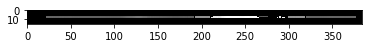

In [3]:
h = 16
y = 125
imgL_trim = imgL[y:y+h].copy()
imgR_trim = imgR[y:y+h].copy()
disparity = stereo.compute(imgL_trim, imgR_trim)
plt.imshow(disparity, 'gray')

In [4]:
disparity[8] # The middle depth values of the depth map used in the following conversion

array([-16, -16, -16, -16, -16, -16, -16, -16, -16, -16, -16, -16, -16,
       -16, -16, -16, -16, -16, -16, -16, -16, -16,  81,  81,  82,  81,
        81,  81,  80,  82,  80,  81,  80,  81,  81,  81,  80,  82,  80,
        79,  80,  80,  78,  79,  79,  79,  79,  79,  80,  79,  78,  79,
        77,  78,  78,  77,  78,  78,  79,  79,  78,  78,  78,  77,  77,
        77,  78,  78,  78,  78,  77,  78,  77,  77,  77,  77,  77,  77,
        77,  77,  77,  77,  76,  77,  77,  76,  76,  76,  76,  76,  76,
        75,  75,  76,  75,  76,  75,  75,  75,  74,  75,  75,  75,  76,
        76,  77,  76,  75,  78,  78,  80,  82,  84,  87,  87,  88,  89,
        90,  90,  90,  91,  92,  94,  95,  96,  98,  99,  99,  99,  99,
        98,  97,  95,  93,  93,  92,  92,  86,  85,  83,  82,  83,  80,
        80,  80,  81,  79,  80,  79,  79,  79,  78,  79,  79,  79,  79,
        77,  78,  76,  76,  75,  75,  74,  74,  74,  74,  73,  72,  73,
        72,  72,  72,  72,  73,  73,  74,  74,  74,  74,  75,  7

In [26]:
def depth_to_haptic(disparity):
    ''' 
    A function to convert depth data into haptic data
        Args:
            disparity (array): an array of and images depth values
        Returns:
            haptic_data (array): an array of haptic values 
    
    The function currently takes in the disparity array, gets the horizontal 
    pixel position or the middle of the depth values (the pixels on the screen),
    horizontal resolution, and then runs through the depth values at the 
    horizontal pixle position. As it runs through, it calculates theta from the 
    depth values from eachvpixel using the equasion ((horizontal-pixile-position
    / horizontal-resolution)- 0.5)*62.2, then converts the outcome into radians.
    Once theta is calculated, it calculates the x and y values using the equasion
    sin(theta)*depth for the x value and cos(theta)*depth for the x value
    
    The next step is to take the x and y values and compare them to the haptic positions
    '''
    computed_values_array = []
    horiz_resolution = len(disparity[8])
    for pixel_position in range(0, len(disparity[8])-1):
        depth = (256-disparity[8][pixel_position])
        theta = np.radians(((pixel_position/horiz_resolution)-0.5)*62.2)
        x, y = np.sin(theta)*depth, np.cos(theta)*depth
        computed_values_array.append((x, y))
    return computed_values_array

results = depth_to_haptic(disparity)
X = [cord[0] for cord in results]
Y = [cord[1] for cord in results]

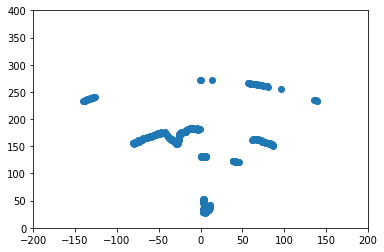

In [30]:
plt.xlim((-200, 200))
plt.ylim((0, 400))
plt.scatter(X, Y,)